In [1]:
from keras.applications.vgg16 import VGG16
#Load the model
model = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


we can do on any model but must be trained so only took trained model
1. First we will see the filters
2. Second we will give an image and see how feature map looks

In [2]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

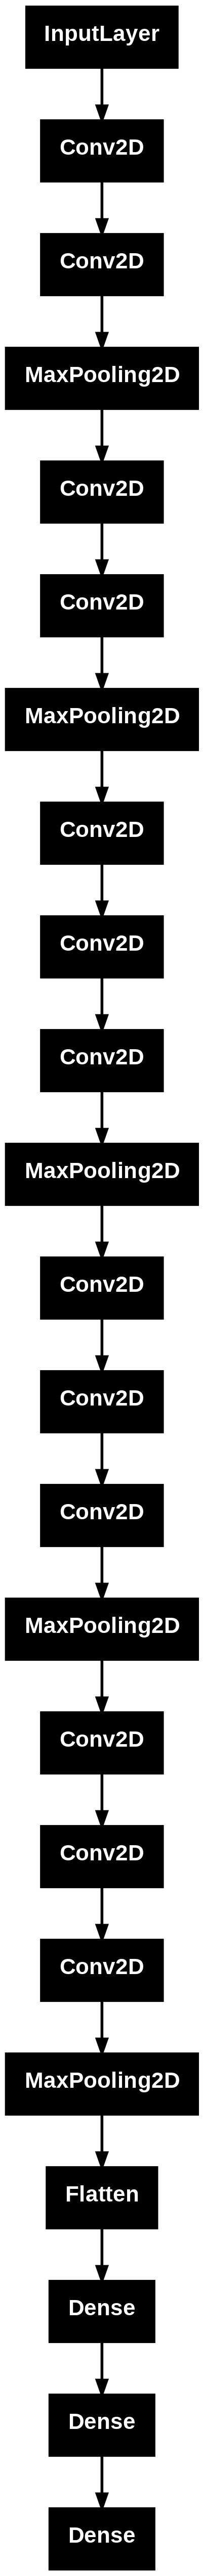

In [3]:
#Diagram
from keras.utils import plot_model
plot_model(model)

In [4]:
#Now write a code to get only filters
for i in range(len(model.layers)):
  #check for convolutional layer
  if 'conv' not in model.layers[i].name:
    continue
  #get filter weights
  filters, biases = model.layers[i].get_weights()
  print("Layer Number",i,model.layers[i].name,filters.shape)

Layer Number 1 block1_conv1 (3, 3, 3, 64)
Layer Number 2 block1_conv2 (3, 3, 64, 64)
Layer Number 4 block2_conv1 (3, 3, 64, 128)
Layer Number 5 block2_conv2 (3, 3, 128, 128)
Layer Number 7 block3_conv1 (3, 3, 128, 256)
Layer Number 8 block3_conv2 (3, 3, 256, 256)
Layer Number 9 block3_conv3 (3, 3, 256, 256)
Layer Number 11 block4_conv1 (3, 3, 256, 512)
Layer Number 12 block4_conv2 (3, 3, 512, 512)
Layer Number 13 block4_conv3 (3, 3, 512, 512)
Layer Number 15 block5_conv1 (3, 3, 512, 512)
Layer Number 16 block5_conv2 (3, 3, 512, 512)
Layer Number 17 block5_conv3 (3, 3, 512, 512)


In [5]:
#retrieve weight from the second hidden layer
filters, bias = model.layers[1].get_weights()

In [6]:
#normalize filter value to 0-1 so we can visualize them
f_min , f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

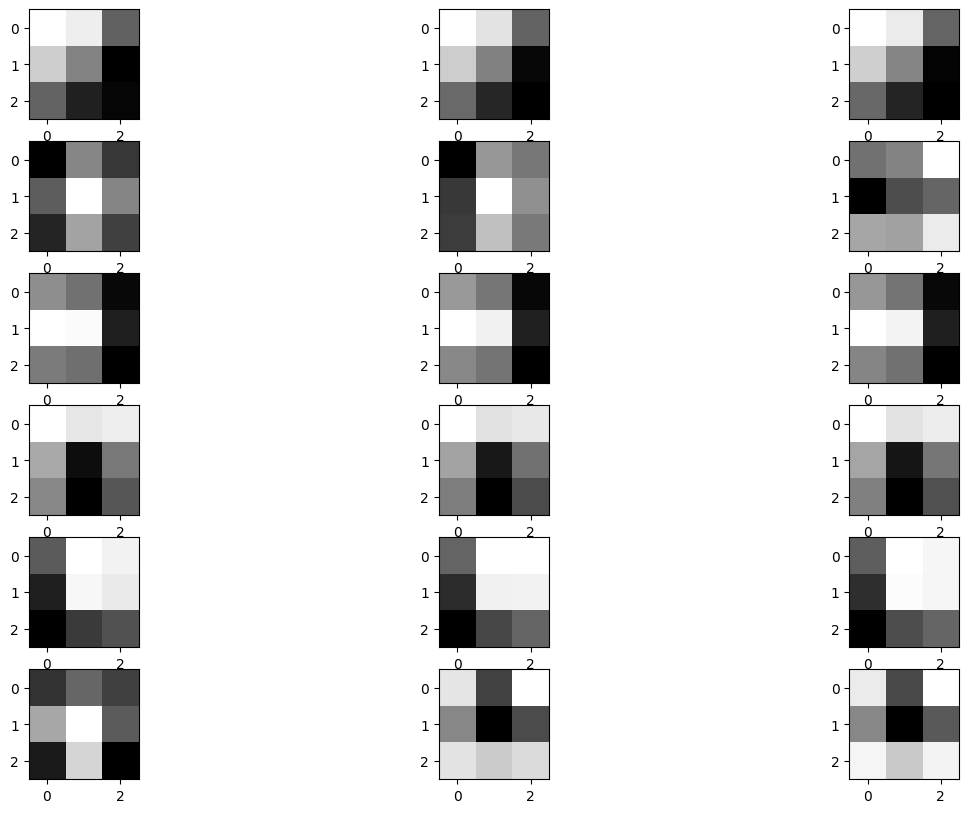

In [8]:
import matplotlib.pyplot as pyplot

#See filters
n_filters = 6
ix = 1
fig = pyplot.figure(figsize=(15,10))
for i in range(n_filters):
  #get the filters
  f = filters[:,:,:,i]
  for j in range(3):
    #subplots for 6 filters  and 3 channels
    pyplot.subplot(n_filters,3,ix)
    pyplot.imshow(f[:,:,j],cmap='gray')
    ix+=1
#plot the filters
pyplot.show()

In [9]:
#now we will see when we do convolution operation of filters on the image what does it get
#we made new moedl subset of vgg16
from keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [10]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
image = load_img("/content/DSC00001.jpg", target_size=(224,224))

#convert the image into the array
image = img_to_array(image)
#expand dimensions so that it represents a single 'sample'
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


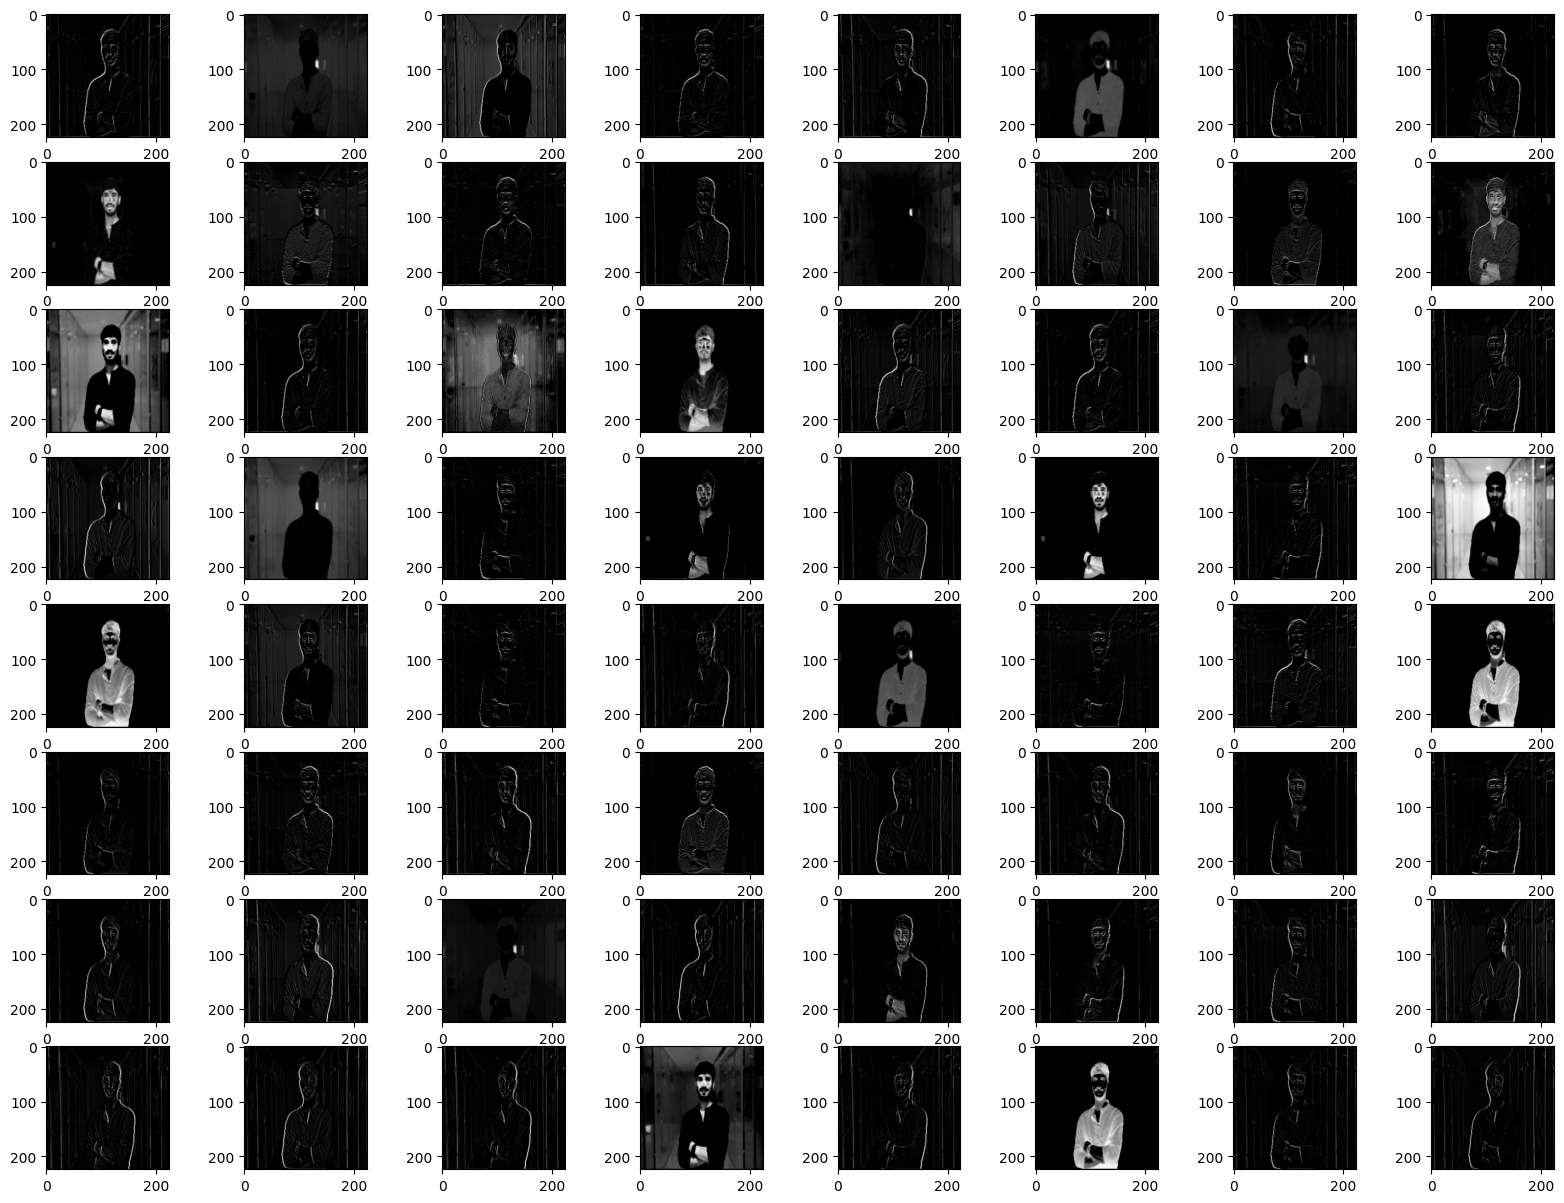

In [11]:
#calculate the feature maps
features = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
  pyplot.subplot(8,8,i)
  pyplot.imshow(features[0,:,:,i-1],cmap='gray')
pyplot.show()

In [12]:
#now let's see in other layers also
model2 = VGG16()

In [13]:
layer_index = [2,5,9,13,17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model(inputs = model2.inputs, outputs = outputs)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


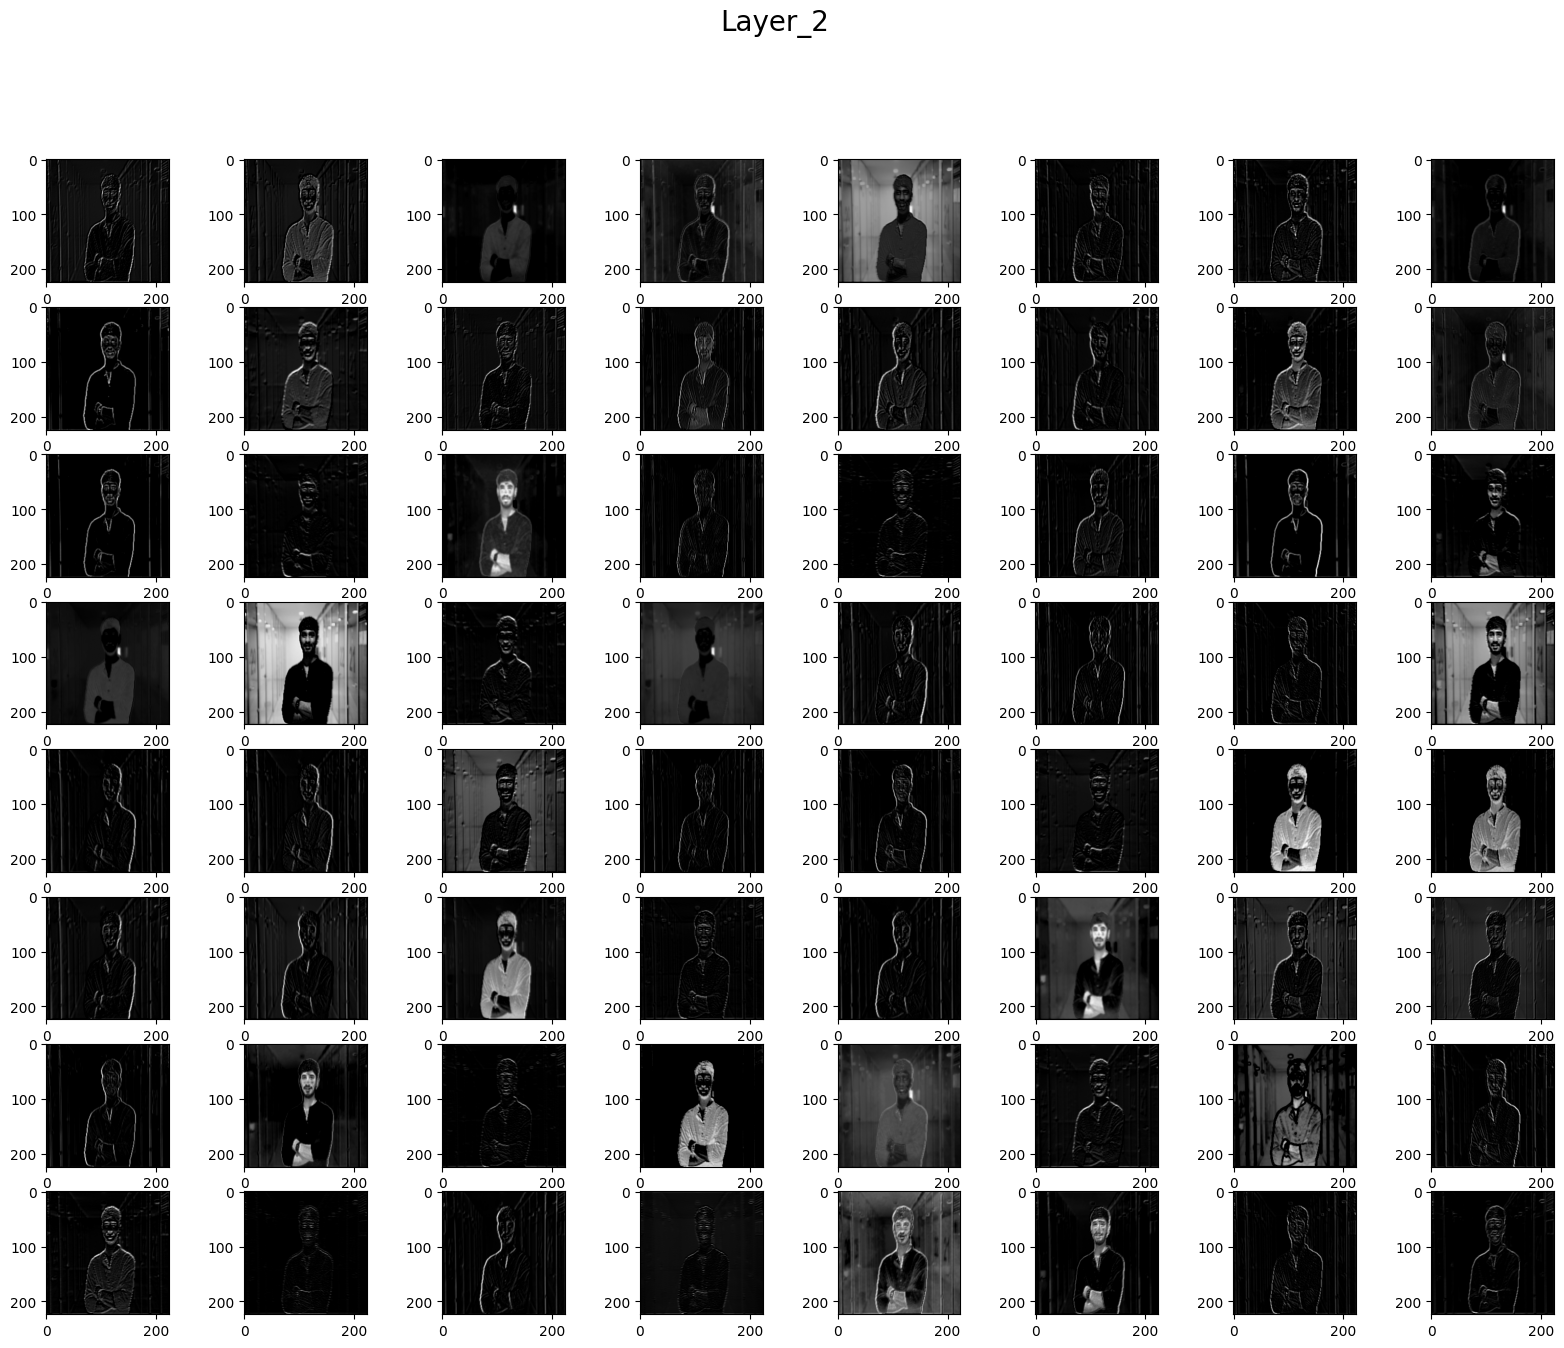

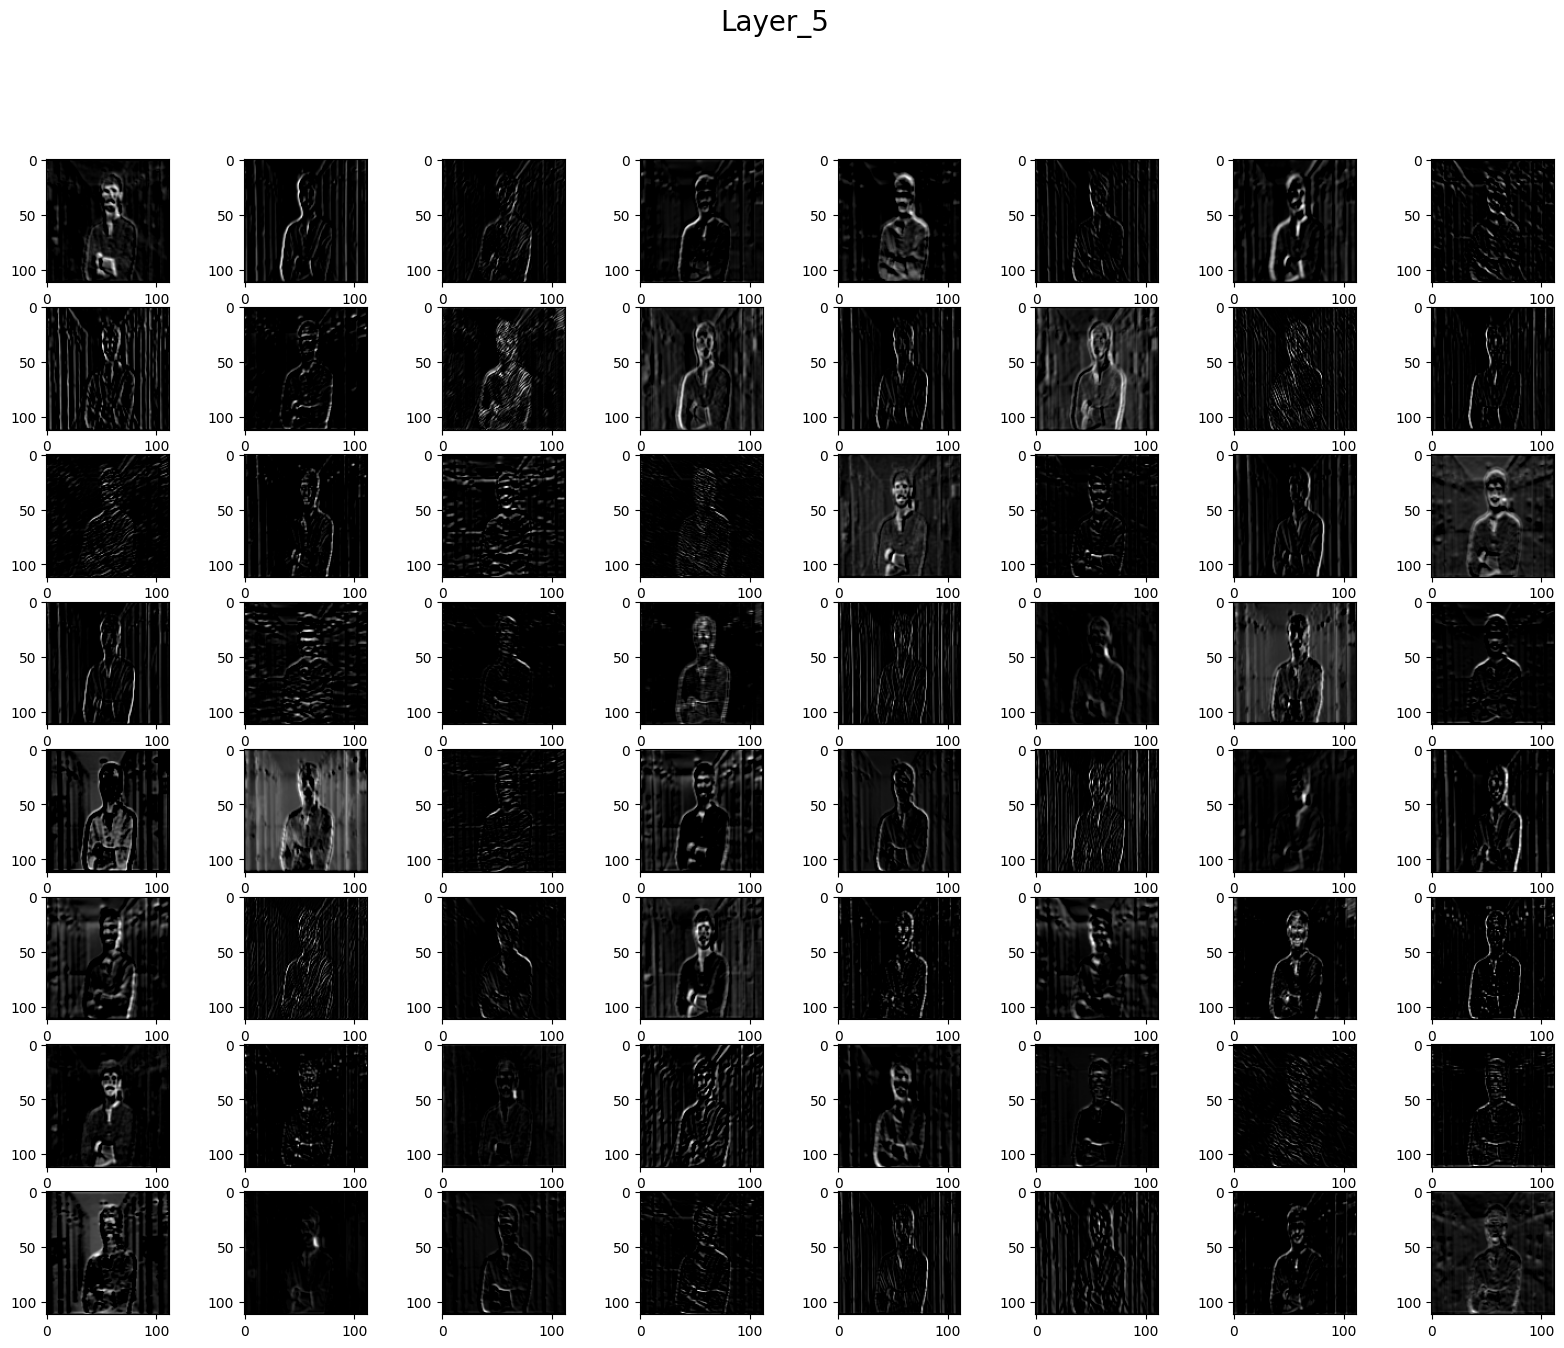

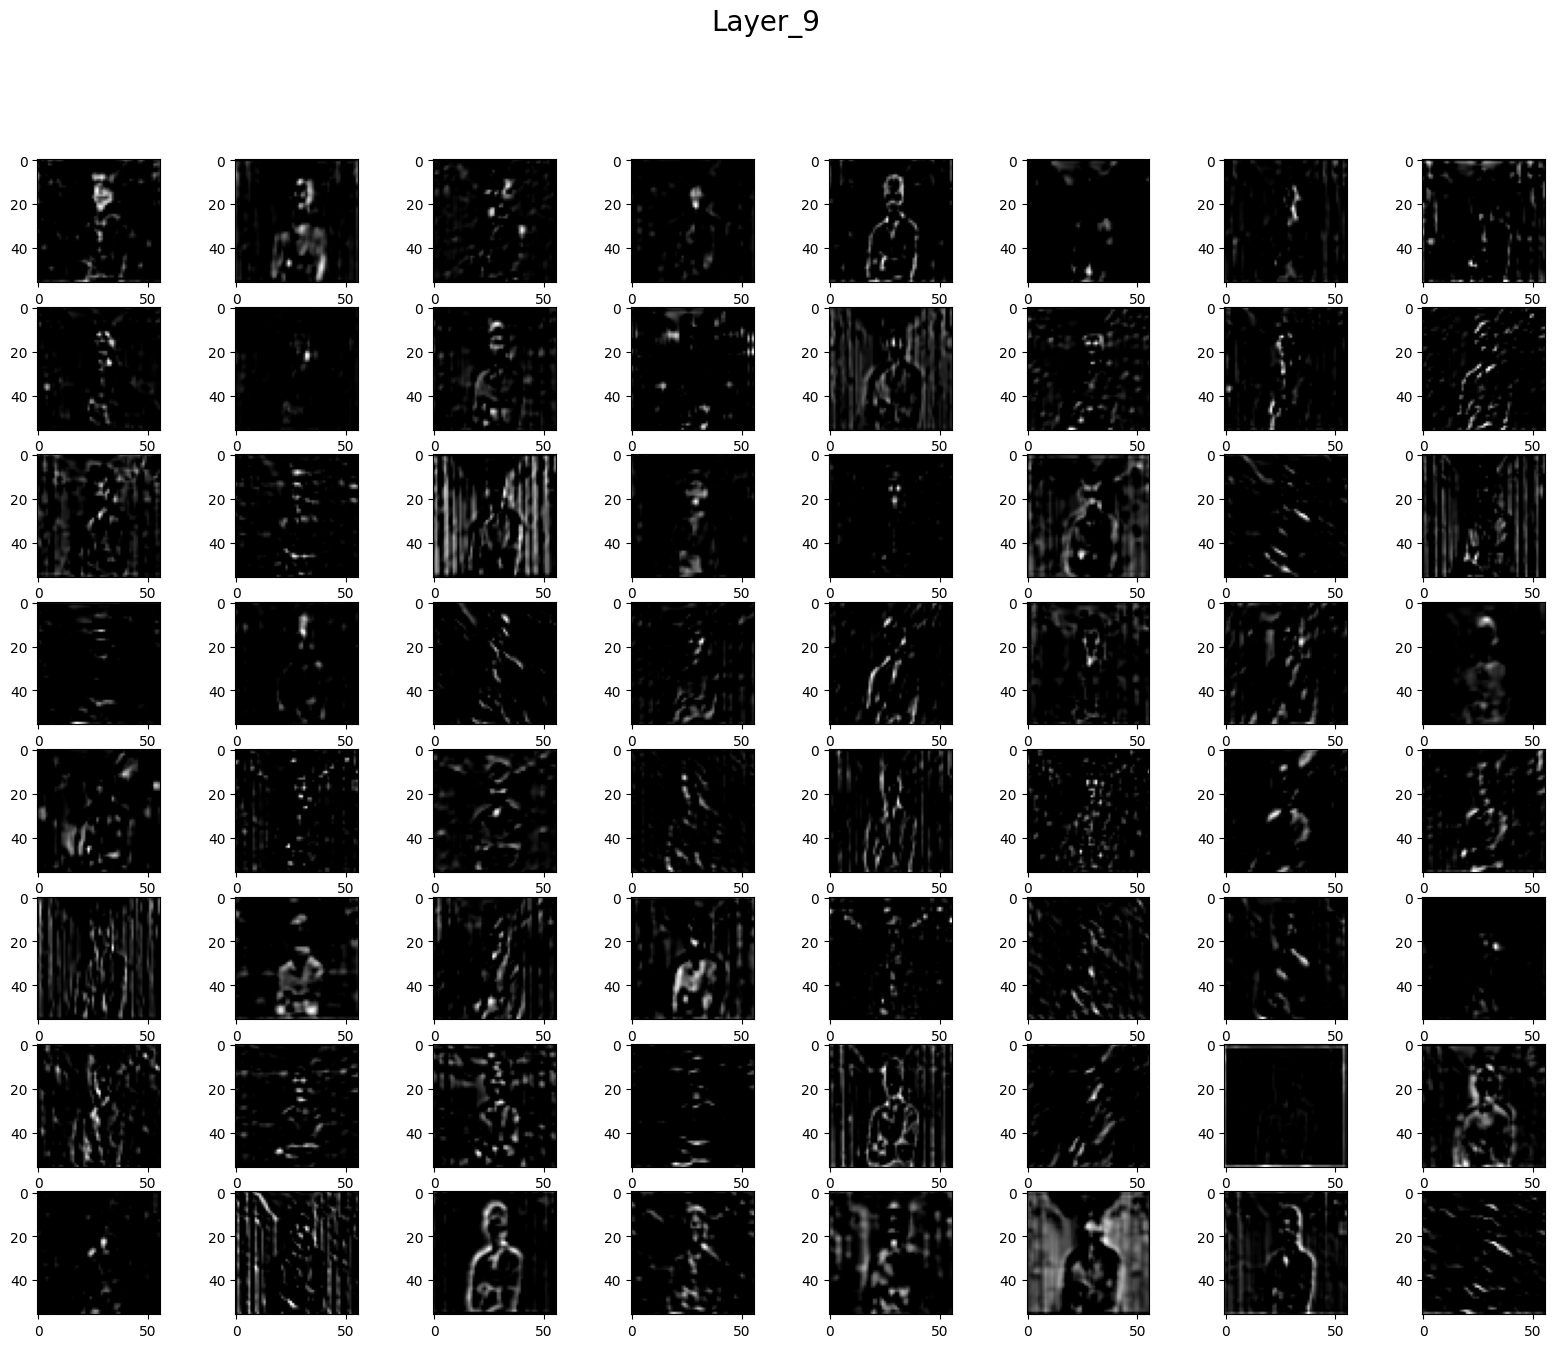

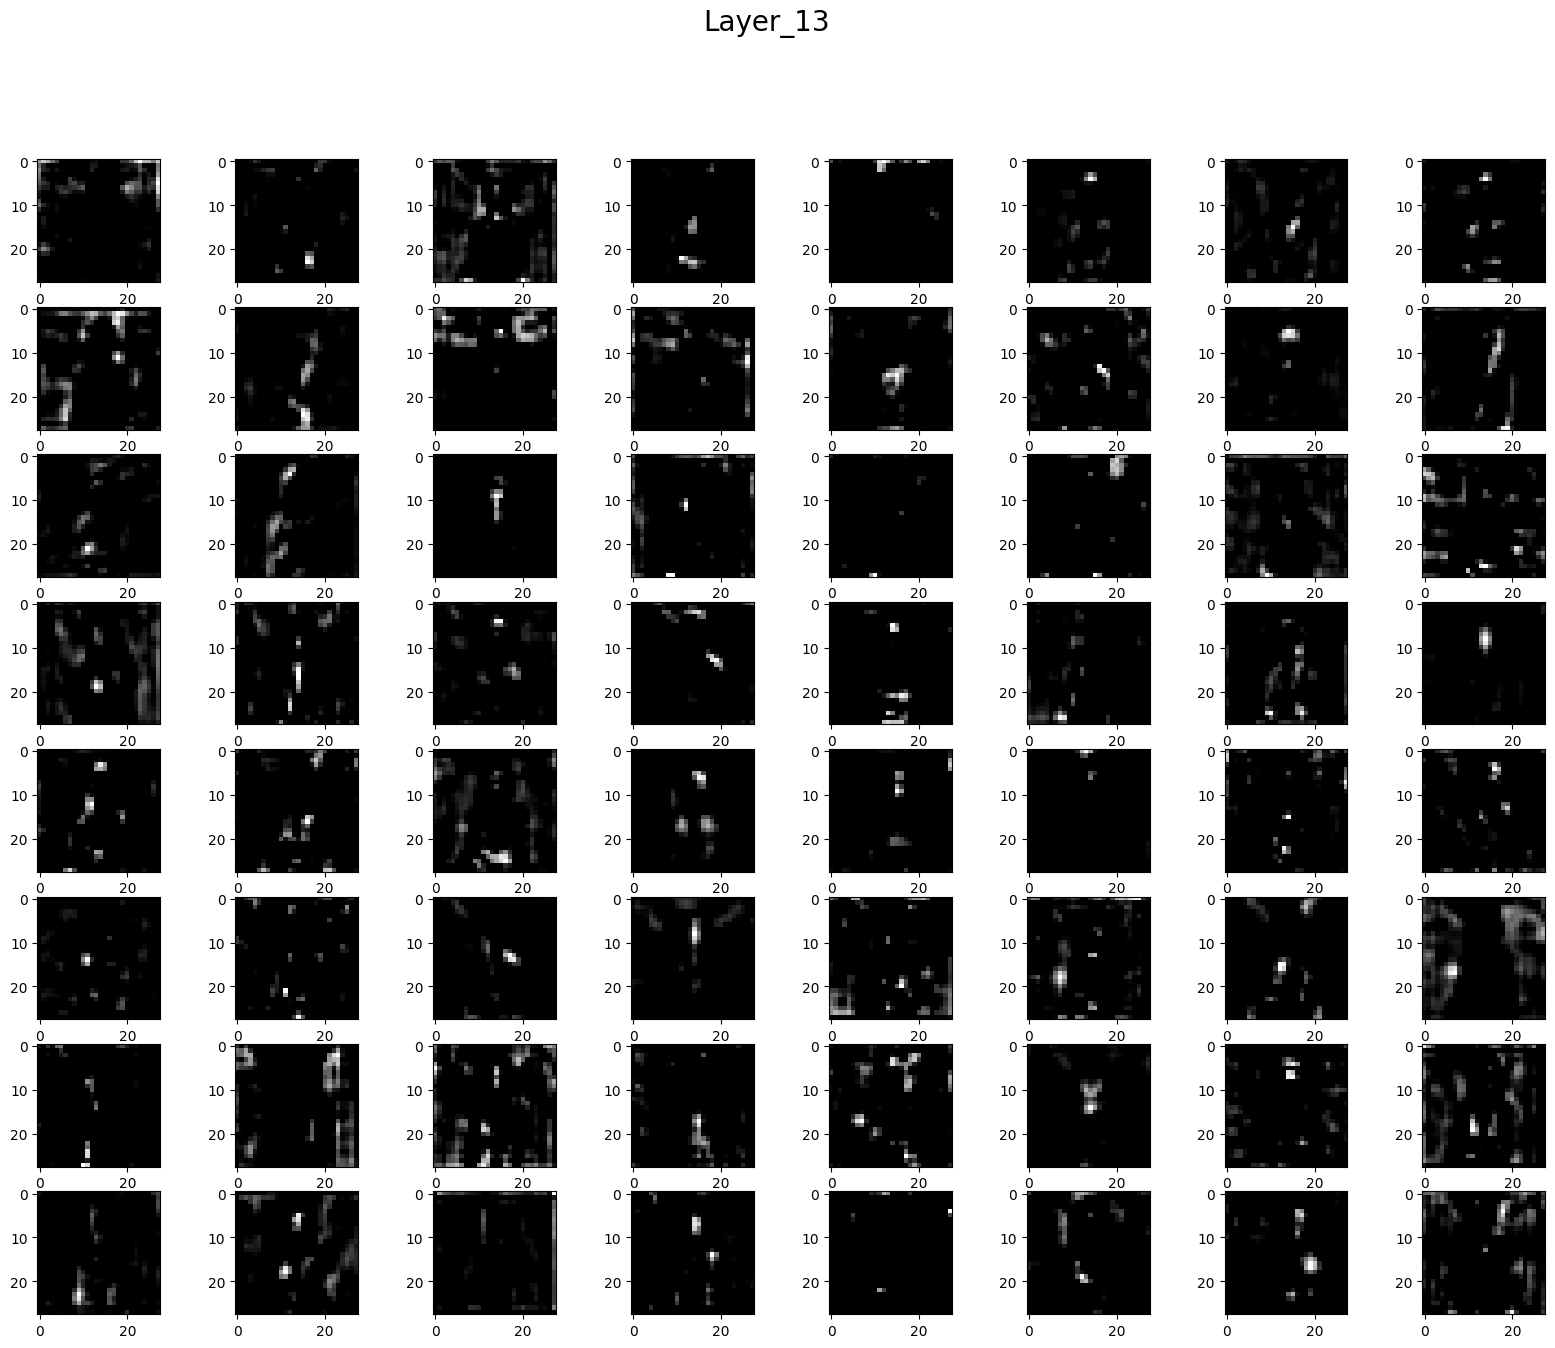

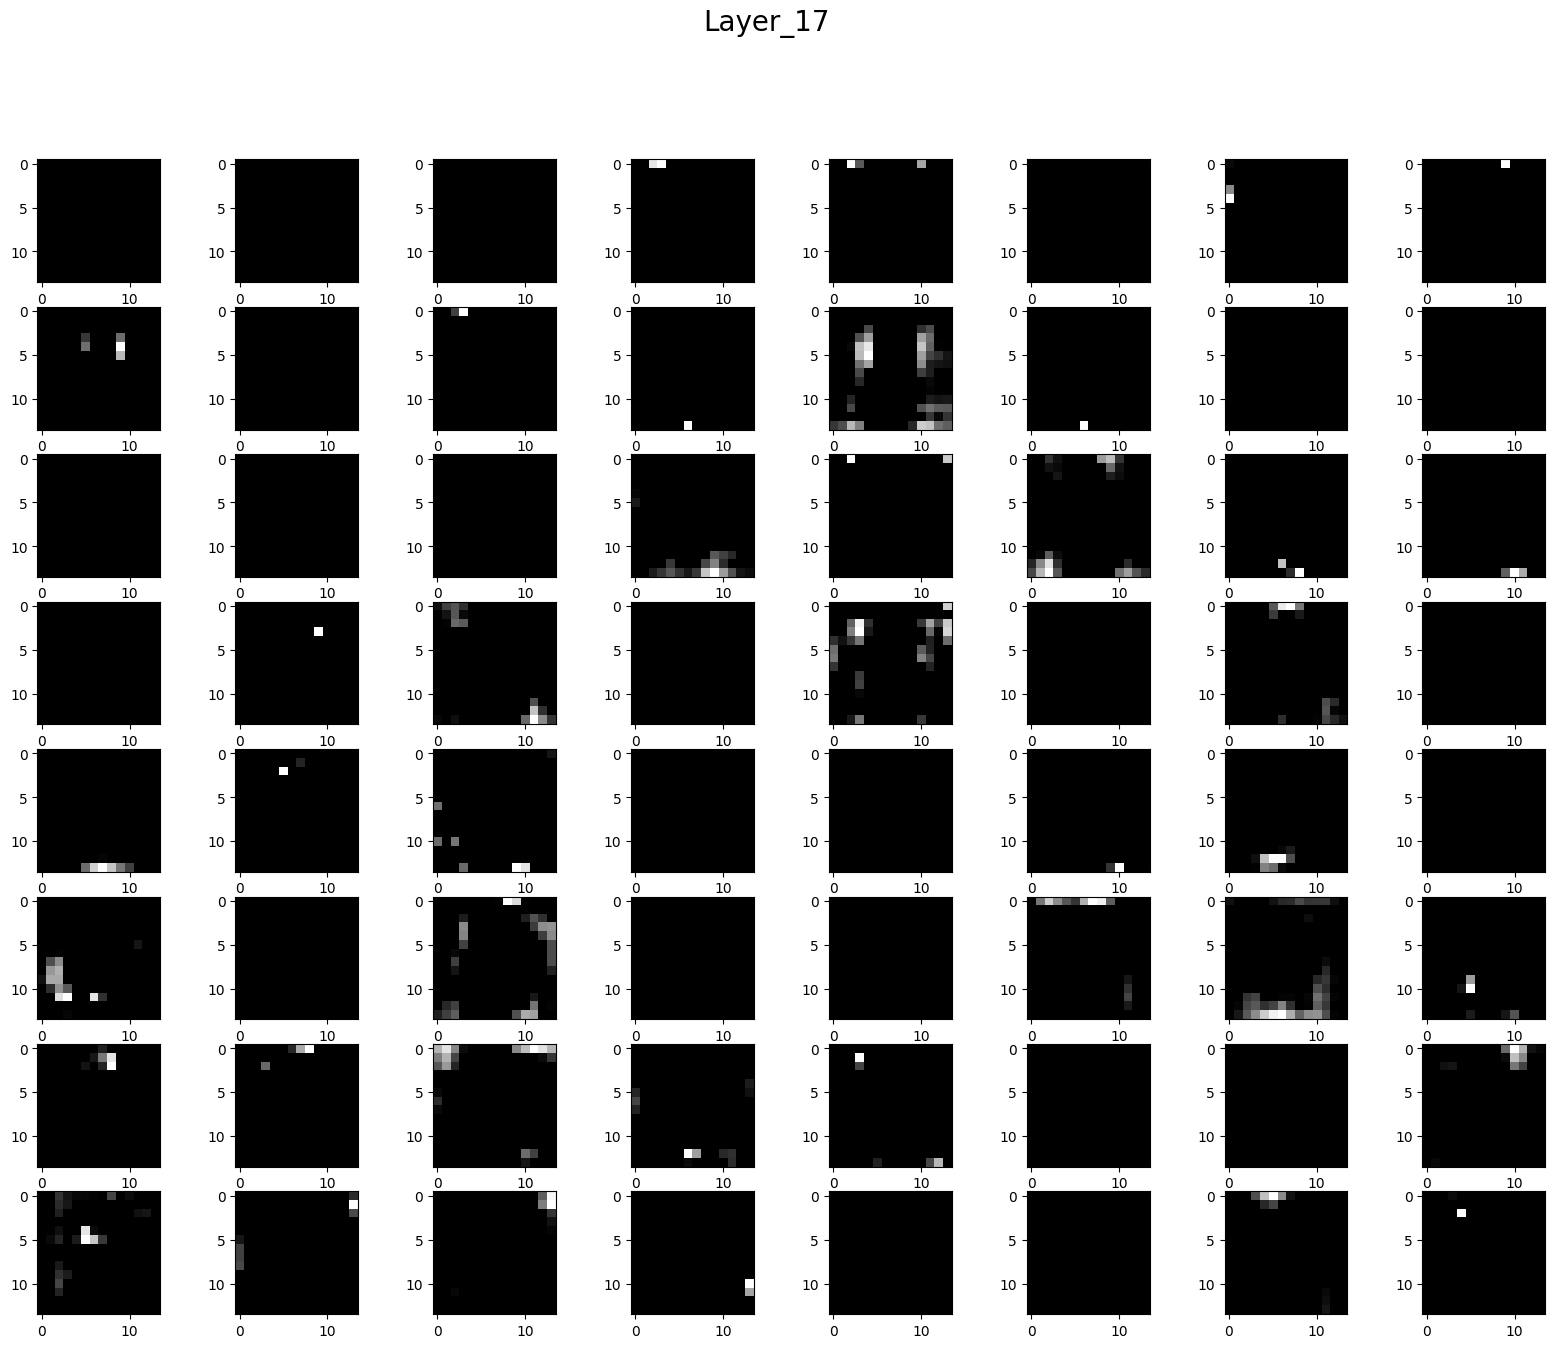

In [14]:
feature_map = model3.predict(image)

for i,fmap in zip(layer_index,feature_map):
  fig = pyplot.figure(figsize=(20,15))
  fig.suptitle("Layer_{}".format(i), fontsize=20)
  for i in range(1,features.shape[3]+1):
    pyplot.subplot(8,8,i)
    pyplot.imshow(fmap[0,:,:,i-1],cmap='gray')
  pyplot.show()

In [ ]:
#till end becomes just the human